<a href="https://www.kaggle.com/code/majomansueti/south-korea?scriptVersionId=241857935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl-jupyter.json
/kaggle/input/keplergl-wheel/keplergl-0.3.7/setup.cfg
/kaggle/input/keplergl-wheel/keplergl-0.3.7/pyproject.toml
/kaggle/input/keplergl-wheel/keplergl-0.3.7/README.md
/kaggle/input/keplergl-wheel/keplergl-0.3.7/MANIFEST.in
/kaggle/input/keplergl-wheel/keplergl-0.3.7/PKG-INFO
/kaggle/input/keplergl-wheel/keplergl-0.3.7/setup.py
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/not-zip-safe
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/dependency_links.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/SOURCES.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/requires.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/top_level.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/PKG-INFO
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl/_version.py
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl/keplergl.py
/kaggle/input/keplerg

In [2]:
import math
import numpy as np
import geopandas as gpd
import pandas as pd

import folium 
from folium import Marker, GeoJson
from folium.plugins import HeatMap,MarkerCluster

from geopy.geocoders import Nominatim
from geopandas.tools import sjoin
from shapely.geometry import MultiPolygon

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
#plantas de energia
power = pd.read_csv("/kaggle/input/geospatial-environmental-and-socioeconomic-data/4_globalpowerplantdatabasev120/globalpowerplantdatabasev120/global_power_plant_database.csv")
power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


## Load the data

In [4]:
#towns
towns = gpd.read_file("/kaggle/input/geospatial-environmental-and-socioeconomic-data/1_CITIES_landscan/ne_10m_populated_places/ne_10m_populated_places.shp")
print(towns.crs) 
towns.head()

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,Colonia del Sacramento,0.0,...,コロニア・デル・サクラメント,콜로니아델사크라멘토,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,4,1159112629,POINT (-57.84000 -34.48000)
1,10,1,8,Admin-1 capital,Trinidad,None,None,0,Trinidad,0.0,...,トリニダ,트리니다드,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,4,1159112647,POINT (-56.90100 -33.54400)
2,10,1,8,Admin-1 capital,Fray Bentos,None,None,0,Fray Bentos,0.0,...,フライ・ベントス,프라이벤토스,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,4,1159112663,POINT (-58.30400 -33.13900)
3,10,1,8,Admin-1 capital,Canelones,None,None,0,Canelones,0.0,...,カネローネス,카넬로네스,Canelones,Canelones,Canelones,Canelones,Canelones,4,1159112679,POINT (-56.28400 -34.53800)
4,10,1,8,Admin-1 capital,Florida,None,None,0,Florida,0.0,...,フロリダ,플로리다,Florida,Florida,Florida,Flordia,Florida,4,1159112703,POINT (-56.21500 -34.09900)


In [5]:
#urban citys in all world
urban = gpd.read_file("/kaggle/input/geospatial-environmental-and-socioeconomic-data/1_CITIES_landscan/ne_10m_urban_areas_landscan/ne_10m_urban_areas_landscan.shp")
print(urban.crs) 
urban.head()

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,name_conve,max_pop_al,max_pop_20,max_pop_50,max_pop_30,max_pop_31,max_natsca,min_areakm,max_areakm,min_areami,...,max_bb_xmi,min_bb_xma,max_bb_xma,min_bb_ymi,max_bb_ymi,min_bb_yma,max_bb_yma,mean_bb_xc,mean_bb_yc,geometry
0,Aalborg,101616.0,101616.0,0.0,0.0,0.0,20.0,76.0,76.0,29.0,...,9.850000,10.033333,10.033333,56.983333,56.983333,57.100000,57.100000,9.933411,57.036154,"POLYGON ((9.98333 57.09167, 9.98333 57.08333, ..."
1,Aarhus,227100.0,227100.0,0.0,0.0,0.0,20.0,131.0,131.0,51.0,...,10.058333,10.350000,10.350000,56.083333,56.083333,56.266667,56.266667,10.180266,56.165522,"POLYGON ((10.32500 56.23333, 10.32500 56.22500..."
2,Aba,851210.0,851210.0,0.0,0.0,0.0,20.0,278.0,278.0,108.0,...,7.233333,7.425000,7.425000,4.883333,4.883333,5.241667,5.241667,7.338774,5.084213,"POLYGON ((7.36667 5.05833, 7.36667 5.05000, 7...."
3,Abadan,260078.0,260078.0,0.0,0.0,0.0,20.0,44.0,44.0,17.0,...,48.233333,48.333333,48.333333,30.308333,30.308333,30.391667,30.391667,48.278750,30.341528,"POLYGON ((48.25000 30.35833, 48.25833 30.35833..."
4,Abaetetuba,79420.0,79420.0,0.0,0.0,0.0,20.0,10.0,10.0,4.0,...,-48.891667,-48.858333,-48.858333,-1.741667,-1.741667,-1.708333,-1.708333,-48.877083,-1.722917,"POLYGON ((-48.86667 -1.70833, -48.86667 -1.716..."


In [6]:
#airports in all world
airports = gpd.read_file("/kaggle/input/geospatial-environmental-and-socioeconomic-data/3_Airports_ports/ne_10m_airports/ne_10m_airports.shp")
print(airports.crs) 
airports.head()

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.0,...,None,None,None,Ludhiana Airport,None,None,None,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.0,...,None,None,None,None,None,None,None,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.0,...,Port lotniczy Ranchi,None,None,M. O. Ranchi,None,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.0,...,Port lotniczy Ahwaz,None,None,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.0,...,Port lotniczy Gwalior,None,None,Gwalior Airport,None,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)


In [7]:
#ports in all world
ports = gpd.read_file("/kaggle/input/geospatial-environmental-and-socioeconomic-data/3_Airports_ports/ne_10m_ports/ne_10m_ports.shp")
print(ports.crs) 
ports.head()

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,scalerank,featurecla,name,website,natlscale,geometry
0,8,Port,Sint Nicolaas,www.rocargo.com/SanNicolas.html,5.0,POINT (-69.92356 12.43750)
1,8,Port,Campana,www.consejoportuario.com.ar,5.0,POINT (-58.95141 -34.15333)
2,8,Port,Zarate,www.consejoportuario.com.ar,5.0,POINT (-59.00495 -34.09889)
3,8,Port,Puerto Belgrano/Bahia Blanca,None,5.0,POINT (-62.10088 -38.89444)
4,8,Port,Puerto Galvan/Bahia Blanca,None,5.0,POINT (-62.30053 -38.78306)


In [8]:
#roads in all world
road = gpd.read_file("/kaggle/input/geospatial-environmental-and-socioeconomic-data/2_Roads_railroads/ne_10m_roads/ne_10m_roads.shp")
print(road.crs) 
road.head()

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,...,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,...,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,...,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,...,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (-87.72757 44.15165, -87.57301 44.1..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,...,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((-74.75920 39.14301, -74.6735..."


In [9]:
#railroads in all world
railroads = gpd.read_file("/kaggle/input/geospatial-environmental-and-socioeconomic-data/2_Roads_railroads/ne_10m_railroads/ne_10m_railroads.shp")
print(railroads.crs) 
railroads.head()

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,rwdb_rr_id,mult_track,electric,other_code,category,disp_scale,add,featurecla,scalerank,natlscale,part,continent,geometry
0,1,1,1,1,1,1:3m,0,Railroad,10,1.0,ne_global_not_north_america,Europe,"LINESTRING (30.78250 69.46111, 30.77139 69.456..."
1,2,1,1,1,1,1:20m,0,Railroad,7,20.0,ne_global_not_north_america,Europe,"LINESTRING (30.73028 69.44805, 30.72473 69.450..."
2,3,1,1,1,1,1:10m,0,Railroad,8,10.0,ne_global_not_north_america,Europe,"LINESTRING (31.23793 69.60437, 31.23278 69.600..."
3,4,1,1,1,1,1:20m,0,Railroad,7,20.0,ne_global_not_north_america,Europe,"LINESTRING (30.73028 69.44805, 30.73639 69.445..."
4,5,1,2,1,1,1:10m,0,Railroad,8,10.0,ne_global_not_north_america,Asia,"LINESTRING (87.66278 69.35889, 87.67722 69.361..."


## Filter the data in South Korea

In [10]:
#power plants in South Korea
SK_power = power[power["country_long"] == "South Korea"]
SK_power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
16710,KOR,South Korea,Andong Kowaco,WRI1029853,90.0,36.5847,128.7739,Hydro,NaN,NaN,...,http://english.kwater.or.kr/web/eng/download/2...,WRI,1018224,NaN,NaN,NaN,NaN,NaN,NaN,116.079999
16711,KOR,South Korea,Ansan Project,WRI1029881,834.0,37.2952,126.7788,Gas,NaN,NaN,...,http://www.poscoenc.com/eng/business/business_...,WRI,1090681,NaN,NaN,NaN,NaN,NaN,NaN,3448.240003
16712,KOR,South Korea,Anyang CHP,WRI1029882,493.0,37.3936,126.9671,Gas,NaN,NaN,...,http://www.gsenergy.co.kr/en/business/content....,GEODB,1021133,NaN,NaN,NaN,NaN,NaN,NaN,2038.348107
16713,KOR,South Korea,Asan Baebang CHP,WRI1029883,113.9,36.9909,126.7135,Gas,NaN,NaN,...,http://www.lottecon.co.kr/plant/references?&pa...,WRI,1071162,NaN,NaN,NaN,NaN,NaN,NaN,470.928701
16714,KOR,South Korea,Baekje,WRI1029865,2.6,36.3174,126.9401,Hydro,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/Korean%20St...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.353422


In [11]:
#polygon of the limits of South Korea
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
SK =  world[world.name == "South Korea"]
type(SK)
SK.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."


In [12]:
#towns in South Korea
SK_towns = sjoin(towns, SK, how = 'inner')
SK_towns['lon'] = SK_towns.geometry.x  
SK_towns['lat'] = SK_towns.geometry.y
SK_towns.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,ne_id,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est,lon,lat
900,8,10,3,Populated place,Eumseong,None,None,0,Eumseong,0.0,...,1159127509,POINT (127.68971 36.93525),96,51181299,Asia,South Korea,KOR,1929000.0,127.689715,36.935251
901,8,10,3,Admin-1 capital,Cheongju,None,Ch'ungju,0,Cheongju,0.0,...,1159127519,POINT (127.50120 36.64390),96,51181299,Asia,South Korea,KOR,1929000.0,127.501199,36.643899
902,8,10,3,Populated place,Wonju,None,None,0,Wonju,0.0,...,1159127533,POINT (127.93962 37.35515),96,51181299,Asia,South Korea,KOR,1929000.0,127.939622,37.355148
903,8,10,3,Admin-1 capital,Chuncheon,None,Ch'unch'on,0,Chuncheon,0.0,...,1159127543,POINT (127.73416 37.87470),96,51181299,Asia,South Korea,KOR,1929000.0,127.734156,37.874702
904,8,10,3,Populated place,Ansan,None,None,0,Ansan,0.0,...,1159127553,POINT (126.85953 37.34807),96,51181299,Asia,South Korea,KOR,1929000.0,126.859533,37.348068


In [13]:
#urban citys in South Korea
SK_urban = sjoin(urban, SK, how = 'inner')
SK_urban.head()


,name_conve,max_pop_al,max_pop_20,max_pop_50,max_pop_30,max_pop_31,max_natsca,min_areakm,max_areakm,min_areami,...,max_bb_yma,mean_bb_xc,mean_bb_yc,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
207,Andong,118522.0,118522.0,0.0,0.0,0.0,20.0,28.0,28.0,11.0,...,36.600000,128.728760,36.566362,"POLYGON ((128.75000 36.59167, 128.75000 36.583...",96,51181299,Asia,South Korea,KOR,1929000.0
228,Ansan,3306237.0,0.0,0.0,0.0,0.0,10.0,359.0,359.0,139.0,...,37.528163,126.847261,37.383173,"POLYGON ((126.74167 37.37500, 126.74167 37.366...",96,51181299,Asia,South Korea,KOR,1929000.0
863,Busan,3930481.0,3931861.0,3931861.0,0.0,0.0,50.0,483.0,488.0,187.0,...,35.350000,129.017293,35.179950,"POLYGON ((129.15000 35.18333, 129.14167 35.183...",96,51181299,Asia,South Korea,KOR,1929000.0
1083,Cheongju,775096.0,0.0,0.0,0.0,0.0,10.0,248.0,248.0,96.0,...,36.808333,127.443021,36.660201,"POLYGON ((127.34167 36.58333, 127.34167 36.591...",96,51181299,Asia,South Korea,KOR,1929000.0
1163,Chuncheon,226509.0,0.0,0.0,0.0,0.0,10.0,64.0,64.0,25.0,...,37.958333,127.742199,37.899113,"POLYGON ((127.73333 37.94167, 127.73333 37.933...",96,51181299,Asia,South Korea,KOR,1929000.0


In [14]:
#airports in South Korea
SK_airports = sjoin(airports, SK, how = 'inner')
SK_airports['lon'] = SK_airports.geometry.x  
SK_airports['lat'] = SK_airports.geometry.y
SK_airports.head()

,scalerank,featurecla,type,name_left,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,ne_id,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est,lon,lat
26,9,Airport,major,Cheongju Int'l,CJJ,terminal,RKTU,CJJ,http://en.wikipedia.org/wiki/Cheongju_Internat...,8.0,...,1159114253,POINT (127.49592 36.72202),96,51181299,Asia,South Korea,KOR,1929000.0,127.495916,36.722023
27,9,Airport,mid and military,Gwangju,KWJ,terminal,RKJJ,KWJ,http://en.wikipedia.org/wiki/Gwangju_Airport,8.0,...,1159114271,POINT (126.81084 35.14001),96,51181299,Asia,South Korea,KOR,1929000.0,126.810839,35.140005
28,9,Airport,mid,Daegu Int'l,TAE,terminal,RKTN,TAE,http://en.wikipedia.org/wiki/Daegu_Airport,8.0,...,1159114289,POINT (128.63754 35.89993),96,51181299,Asia,South Korea,KOR,1929000.0,128.637538,35.899928
29,9,Airport,mid,Ulsan,USN,terminal,RKPU,USN,http://en.wikipedia.org/wiki/Ulsan_Airport,8.0,...,1159114319,POINT (129.35573 35.59290),96,51181299,Asia,South Korea,KOR,1929000.0,129.355731,35.592896
397,7,Airport,mid,Yangyang Int'l,YNY,terminal,RKNY,YNY,http://en.wikipedia.org/wiki/Yangyang_Internat...,15.0,...,1159121051,POINT (128.66299 38.05878),96,51181299,Asia,South Korea,KOR,1929000.0,128.662989,38.058782


In [15]:
#ports in South Korea
SK_ports = sjoin(ports, SK, how = 'inner')
SK_ports['lon'] = SK_ports.geometry.x  
SK_ports['lat'] = SK_ports.geometry.y
SK_ports.head()

,scalerank,featurecla,name_left,website,natlscale,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est,lon,lat
399,7,Port,Gunsan,gunsan.mltm.go.kr/eng,10.0,POINT (126.58810 35.95972),96,51181299,Asia,South Korea,KOR,1929000.0,126.588104,35.959722
400,7,Port,Pohang,None,10.0,POINT (129.40283 36.01972),96,51181299,Asia,South Korea,KOR,1929000.0,129.402827,36.019722
401,7,Port,Samcheok,donghae.momaf.go.kr,10.0,POINT (129.18828 37.43361),96,51181299,Asia,South Korea,KOR,1929000.0,129.188280,37.433611
402,7,Port,Sokcho,donghae.momaf.go.kr,10.0,POINT (128.59234 38.20694),96,51181299,Asia,South Korea,KOR,1929000.0,128.592344,38.206944


In [16]:
#railroads in South Korea
SK_railroads = sjoin(railroads, SK, how = 'inner')
SK_railroads.head()

,rwdb_rr_id,mult_track,electric,other_code,category,disp_scale,add,featurecla,scalerank,natlscale,part,continent_left,geometry,index_right,pop_est,continent_right,name,iso_a3,gdp_md_est
19616,19617,1,1,1,2,1:5m,0,Railroad,9,5.0,ne_global_not_north_america,Asia,"LINESTRING (127.04222 37.74750, 127.04167 37.7...",96,51181299,Asia,South Korea,KOR,1929000.0
19633,19634,1,1,1,2,1:5m,0,Railroad,9,5.0,ne_global_not_north_america,Asia,"LINESTRING (126.81361 37.62583, 126.81917 37.6...",96,51181299,Asia,South Korea,KOR,1929000.0
19634,19635,2,1,1,2,1:80m,0,Railroad,4,150.0,ne_global_not_north_america,Asia,"LINESTRING (126.81361 37.62583, 126.81222 37.6...",96,51181299,Asia,South Korea,KOR,1929000.0
19635,19636,1,1,1,2,1:5m,0,Railroad,9,5.0,ne_global_not_north_america,Asia,"LINESTRING (127.05722 37.62306, 127.05667 37.6...",96,51181299,Asia,South Korea,KOR,1929000.0
19636,19637,1,1,1,2,1:5m,0,Railroad,9,5.0,ne_global_not_north_america,Asia,"LINESTRING (127.05722 37.62306, 127.06889 37.6...",96,51181299,Asia,South Korea,KOR,1929000.0


In [17]:
#roads in South Korea
SK_road = sjoin(road, SK, how = 'inner')
SK_road.head()

,scalerank,featurecla,type,sov_a3,note,edited,name_left,namealt,namealtt,routeraw,...,level,min_zoom,min_label,geometry,index_right,pop_est,continent_right,name_right,iso_a3,gdp_md_est
21339,9,Road,Unknown,None,None,New in version 2.0.0,None,None,None,None,...,None,7.6,10.1,"LINESTRING (128.35936 38.57825, 128.37999 38.5...",96,51181299,Asia,South Korea,KOR,1929000.0
21359,9,Road,Unknown,None,None,New in version 2.0.0,None,None,None,None,...,None,7.6,10.1,"LINESTRING (127.99229 38.62362, 128.00466 38.6...",96,51181299,Asia,South Korea,KOR,1929000.0
21432,9,Road,Unknown,None,None,New in version 2.0.0,None,None,None,None,...,None,7.6,10.1,"LINESTRING (128.45010 38.38028, 128.45423 38.3...",96,51181299,Asia,South Korea,KOR,1929000.0
21460,5,Road,Unknown,None,None,New in version 2.0.0,None,None,None,None,...,None,5.0,8.0,"LINESTRING (128.23976 38.12456, 128.20264 38.1...",96,51181299,Asia,South Korea,KOR,1929000.0
21478,9,Road,Unknown,None,None,New in version 2.0.0,None,None,None,None,...,None,7.6,10.1,"LINESTRING (128.56559 38.21530, 128.61095 38.1...",96,51181299,Asia,South Korea,KOR,1929000.0


In [18]:
m = folium.Map([48.2, 16.4], zoom_start=5, tiles='Stamen Toner')

####################SK_railroads######################
graph = SK_railroads["geometry"]
graph = graph.to_crs("EPSG:3395")
graph

folium.Choropleth(
    graph[graph.geometry.length>0.001],
    line_weight = 3,
    line_color = "red"
).add_to(m)
#######################
graph = SK_road["geometry"]
graph = graph.to_crs("EPSG:3395")
graph

folium.Choropleth(
    graph[graph.geometry.length>0.1],
    line_weight = 3,
    line_color = "blue"
).add_to(m)
#######################SK_towns#########################
mc_towns = MarkerCluster()
HeatMap(data = SK_towns[["lat","lon"]], radius = 15).add_to(m)
for idx, row in SK_towns.iterrows():    
    mc_towns.add_child(folium.Marker([row["lat"], row["lon"]],
                                popup = row[["NAME","lon","lat"]],
                                icon = folium.Icon(color = 'green',
                                                icon_color = 'white', 
                                                icon = "home",
                                                angle = 0,
                                                prefix = "fa"),)).add_to(m)
#######################SK_airports###########################
for idx, row in SK_airports.iterrows():    
    folium.Marker([row["lat"], row["lon"]],
                                popup = row[["name_left","lon","lat"]],
                                icon = folium.Icon(color = 'blue',
                                                icon_color = 'white', 
                                                icon = "plane",
                                                angle = 0,
                                                prefix = "fa"),).add_to(m)

#######################SK_ports###############################
for idx, row in SK_ports.iterrows():    
    folium.Marker([row["lat"],row["lon"]],
                                popup = row[["name_left","lon","lat"]],
                                icon = folium.Icon(color = 'darkblue',
                                                icon_color = 'white', 
                                                icon = "ship",
                                                angle = 0,
                                                prefix = "fa"),).add_to(m)
########################SK_power#############################
for idx, row in SK_power.iterrows():    
    folium.Marker([row["latitude"], row["longitude"]],
                                    popup = row[["name","latitude","latitude"]],
                                    icon = folium.Icon(color = 'beige',
                                                icon_color = 'white', 
                                                icon = "flash",
                                                angle = 0,
                                                prefix = "fa"),).add_to(m)

m

**SOCIO ECONOMIC ANALISYS**

In [19]:
import os

# List the contents of the directory
directory_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/'
print(os.listdir(directory_path))


['7_Land_cover', '12_Cattle', '4_globalpowerplantdatabasev120', '8_GFW_deforestation', '6_GDP', '5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0', '2_Roads_railroads', '10_solar_potential', '11_temperature', '3_Airports_ports', '1_CITIES_landscan', '9_GFW_potential_carbon_sequestration']


In [20]:
import os

# List the contents of the specific subdirectory
subdirectory_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/'
print(os.listdir(subdirectory_path))


['GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0']


In [21]:
import os

# List the contents of the nested subdirectory
nested_subdirectory_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/'
print(os.listdir(nested_subdirectory_path))


['GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0.tif.aux.xml', 'GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0.tif', 'GHSL_Data_Package_2019_light.pdf', 'GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0.tif.ovr', 'GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0.tif.xml']


In [22]:
import rasterio

# Define the correct file path
raster_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0.tif'

# Try to open the raster file
try:
    raster = rasterio.open(raster_path)
    print("File opened successfully")
except rasterio.errors.RasterioIOError:
    print("Failed to open the file. Please check the file path.")


File opened successfully


**Load and Explore Raster Data**

Raster metadata (downsampled): {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -200.0, 'width': 144328, 'height': 72000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(250.0, 0.0, -18041000.0,
       0.0, -250.0, 9000000.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
New shape: (7200, 14432)


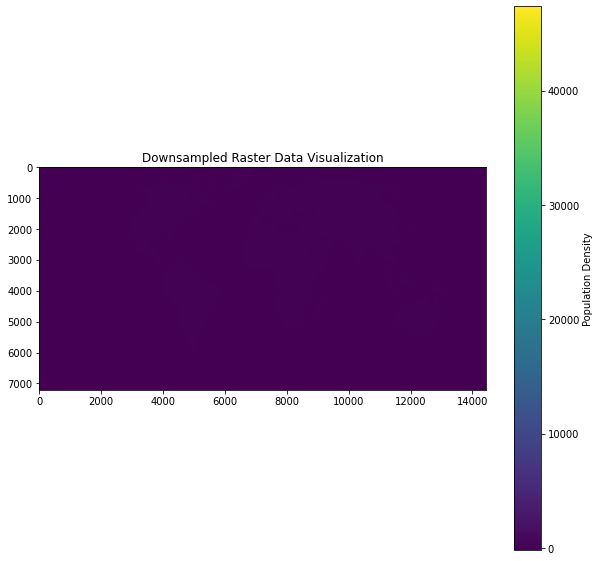

In [23]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Define the file path
raster_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0.tif'

# Open the raster file
with rasterio.open(raster_path) as raster:
    # Downsample the data by a factor of 10
    data = raster.read(
        1,
        out_shape=(
            1,
            int(raster.height // 10),
            int(raster.width // 10)
        )
    )

    # Update the transform for the downsampled data
    transform = raster.transform * raster.transform.scale(
        (raster.width / data.shape[-1]),
        (raster.height / data.shape[-2])
    )

    # Print raster metadata
    profile = raster.profile
    print("Raster metadata (downsampled):", profile)
    print("New shape:", data.shape)

# Display the downsampled raster data
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='viridis')
plt.colorbar(label='Population Density')
plt.title('Downsampled Raster Data Visualization')
plt.show()


**Mask the Raster Data for South Korea**

In [24]:
import os

# List files in the input directory to find the correct path
input_dir = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/'
files = os.listdir(input_dir)
print(files)


['7_Land_cover', '12_Cattle', '4_globalpowerplantdatabasev120', '8_GFW_deforestation', '6_GDP', '5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0', '2_Roads_railroads', '10_solar_potential', '11_temperature', '3_Airports_ports', '1_CITIES_landscan', '9_GFW_potential_carbon_sequestration']


In [25]:
import os

# Define the base directory
base_directory_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/'

# List directories in the base directory
directories = [
    '7_Land_cover', '12_Cattle', '4_globalpowerplantdatabasev120', '8_GFW_deforestation',
    '6_GDP', '5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0', '2_Roads_railroads', '10_solar_potential',
    '11_temperature', '3_Airports_ports', '1_CITIES_landscan', '9_GFW_potential_carbon_sequestration'
]

# Check contents of each directory
for directory in directories:
    path = os.path.join(base_directory_path, directory)
    if os.path.exists(path):
        print(f"Contents of {directory}:")
        print(os.listdir(path))
        print()
    else:
        print(f"Directory {directory} not found.")


Contents of 7_Land_cover:
['ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7']

Contents of 12_Cattle:
['1_Ct_2010_Metadata.html', '6_Ct_2010_Aw.tif']

Contents of 4_globalpowerplantdatabasev120:
['globalpowerplantdatabasev120']

Contents of 8_GFW_deforestation:
['Goode_FinalClassification_19_05pcnt_prj']

Contents of 6_GDP:
['doi_10.5061_dryad.dk1j0__v2']

Contents of 5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0:
['GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0']

Contents of 2_Roads_railroads:
['ne_10m_railroads', 'ne_10m_roads']

Contents of 10_solar_potential:
['World_GTI_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF', 'World_PVOUT_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF', 'World_GHI_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF']

Contents of 11_temperature:
['World_TEMP_GISdata_LTAy_GlobalSolarAtlas-v2_GEOTIFF']

Contents of 3_Airports_ports:
['ne_10m_ports', 'ne_10m_airports']

Contents of 1_CITIES_landscan:
['ne_10m_populated_places', 'ne_10m_urban_areas

In [26]:
import os

# List the contents of the directory
directory_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/'
print(os.listdir(directory_path))


['7_Land_cover', '12_Cattle', '4_globalpowerplantdatabasev120', '8_GFW_deforestation', '6_GDP', '5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0', '2_Roads_railroads', '10_solar_potential', '11_temperature', '3_Airports_ports', '1_CITIES_landscan', '9_GFW_potential_carbon_sequestration']


Subset of population raster loaded successfully.


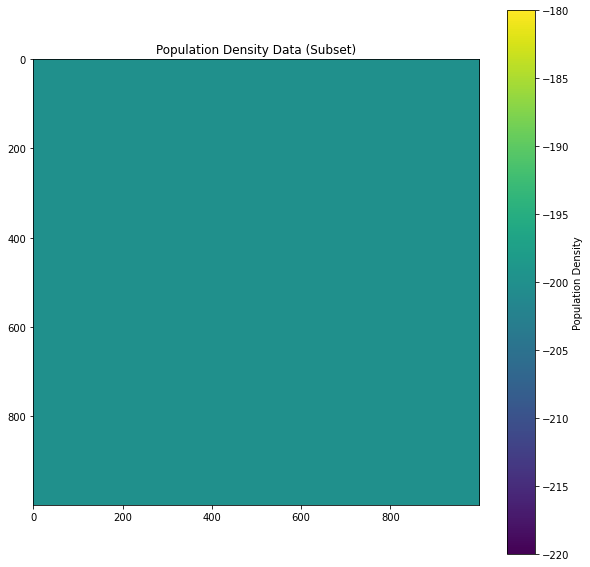

In [27]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.windows import Window

# Define the file path for the population data
population_raster_path = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/5_GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0.tif'

# Open and read a small subset of the raster file
try:
    with rasterio.open(population_raster_path) as raster:
        # Get the dimensions of the raster
        width, height = raster.width, raster.height
        
        # Define a window to read a small subset (e.g., top left corner)
        # Here, we take a window of 1000x1000 pixels; adjust as needed
        window = Window(0, 0, 1000, 1000)
        population_data = raster.read(1, window=window)
        
        transform = raster.window_transform(window)
        print("Subset of population raster loaded successfully.")
except rasterio.errors.RasterioIOError:
    print(f"Failed to open the population file: {population_raster_path}")

# Display the subset of population raster data
if 'population_data' in locals():
    plt.figure(figsize=(10, 10))
    plt.imshow(population_data, cmap='viridis')
    plt.colorbar(label='Population Density')
    plt.title('Population Density Data (Subset)')
    plt.show()



In [28]:
import os
import folium
import geopandas as gpd
import rasterio
import numpy as np
import rasterio.mask
from folium.plugins import HeatMap

In [29]:
data_directory = '/kaggle/input/geospatial-environmental-and-socioeconomic-data/'

In [30]:
import os

# Check for uploaded files in common Kaggle directories
base_dirs = ['/kaggle/input', '/kaggle/working']

for base_dir in base_dirs:
    print(f"Contents of {base_dir}:")
    try:
        for root, dirs, files in os.walk(base_dir):
            for name in files:
                print(os.path.join(root, name))
    except Exception as e:
        print(f"Error accessing {base_dir}: {e}")


Contents of /kaggle/input:
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl-jupyter.json
/kaggle/input/keplergl-wheel/keplergl-0.3.7/setup.cfg
/kaggle/input/keplergl-wheel/keplergl-0.3.7/pyproject.toml
/kaggle/input/keplergl-wheel/keplergl-0.3.7/README.md
/kaggle/input/keplergl-wheel/keplergl-0.3.7/MANIFEST.in
/kaggle/input/keplergl-wheel/keplergl-0.3.7/PKG-INFO
/kaggle/input/keplergl-wheel/keplergl-0.3.7/setup.py
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/not-zip-safe
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/dependency_links.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/SOURCES.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/requires.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/top_level.txt
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl.egg-info/PKG-INFO
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl/_version.py
/kaggle/input/keplergl-wheel/keplergl-0.3.7/keplergl/kepler

In [31]:
m = folium.Map(location=[36.5, 127.8], zoom_start=7, tiles='Stamen Toner')

In [32]:
import geopandas as gpd
import folium

# Load a global administrative boundaries dataset
# Example using 'naturalearth_lowres' from GeoPandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to get only South Korea's boundary
south_korea_boundary = world[world['name'] == 'South Korea']

# Create a Folium map centered on South Korea
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# Function to add a GeoJSON layer to the map
def add_geojson_layer(gdf, color, map_obj, layer_name, popup_attr=None):
    folium.GeoJson(
        gdf,
        style_function=lambda x: {'color': color, 'weight': 2},
        name=layer_name,
        tooltip=folium.GeoJsonTooltip(fields=popup_attr) if popup_attr else None
    ).add_to(map_obj)

# Add South Korea's boundary to the map
add_geojson_layer(south_korea_boundary, 'blue', m, 'South Korea Boundary')

# Display the map
m


In [33]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import geopandas as gpd

# Initialize the map centered on South Korea
m = folium.Map([36.5, 127.8], zoom_start=7, tiles='Stamen Toner')


In [34]:
# Convert geometries to the correct CRS
SK_railroads = SK_railroads.to_crs("EPSG:3395")
SK_road = SK_road.to_crs("EPSG:3395")

# Add railroads to the map
folium.GeoJson(SK_railroads[SK_railroads.geometry.length > 0.001],
               style_function=lambda x: {'color': 'red', 'weight': 2}).add_to(m)

# Add roads to the map
folium.GeoJson(SK_road[SK_road.geometry.length > 0.1],
               style_function=lambda x: {'color': 'blue', 'weight': 1.5}).add_to(m)


In [35]:
# Create marker cluster for towns
mc_towns = MarkerCluster()
for idx, row in SK_towns.iterrows():
    mc_towns.add_child(folium.Marker([row["lat"], row["lon"]],
                                     popup=f"Name: {row['NAME']}<br>Lat: {row['lat']}<br>Lon: {row['lon']}",
                                     icon=folium.Icon(color='green', icon='home', prefix='fa')))
m.add_child(mc_towns)

# Add Heatmap for towns
HeatMap(data=SK_towns[["lat", "lon"]].values, radius=15, blur=10).add_to(m)


In [36]:
# Add markers for airports
for idx, row in SK_airports.iterrows():
    folium.Marker([row["lat"], row["lon"]],
                  popup=f"Name: {row['name_left']}<br>Lat: {row['lat']}<br>Lon: {row['lon']}",
                  icon=folium.Icon(color='blue', icon='plane', prefix='fa')).add_to(m)

# Add markers for ports
for idx, row in SK_ports.iterrows():
    folium.Marker([row["lat"], row["lon"]],
                  popup=f"Name: {row['name_left']}<br>Lat: {row['lat']}<br>Lon: {row['lon']}",
                  icon=folium.Icon(color='darkblue', icon='ship', prefix='fa')).add_to(m)

# Add markers for power facilities
for idx, row in SK_power.iterrows():
    folium.Marker([row["latitude"], row["longitude"]],
                  popup=f"Name: {row['name']}<br>Lat: {row['latitude']}<br>Lon: {row['longitude']}",
                  icon=folium.Icon(color='beige', icon='flash', prefix='fa')).add_to(m)


In [37]:
# Save the map to an HTML file
m.save("south_korea_socioeconomic_map.html")
m

In [38]:
import os

# List files in the current directory (or check the specific Kaggle input folder)
print(os.listdir("/kaggle/input/korean-green-resources"))


['korean_green_resources.csv']


In [39]:
import pandas as pd

# Load the CSV file from the Kaggle input folder
csv_path = "/kaggle/input/korean-green-resources/korean_green_resources.csv"
df = pd.read_csv(csv_path)

# Preview the first few rows
print(df.head())


                  name      lat       lon   resource_type
0           Seoul Town  37.5665  126.9780            Town
1      Incheon Airport  37.4602  126.4407         Airport
2           Busan Port  35.1796  129.0756            Port
3  Gwangju Power Plant  35.1595  126.8526  Power Facility
4         Daejeon Town  36.3504  127.3845            Town
